In [1]:
import pandas as pd

# importing dataset as polars dataframe

df = pd.read_csv("Invisibility Cloak.csv")

df

,Participant,Cloak,Mischief
0,1,0,3
1,2,0,1
2,3,0,5
3,4,0,4
4,5,0,6
5,6,0,4
6,7,0,6
7,8,0,2
8,9,0,0
9,10,0,5


We can see that assumption 

1: The dependent variable (Mischief) is continuous

2: the independent variable (cloak) is categorical, and consists of two independent groups

3: Each participant is present to only one group

thus the first three assumptions in conducting an independent t-test is met

Creating a rain cloud plot to see outliers:

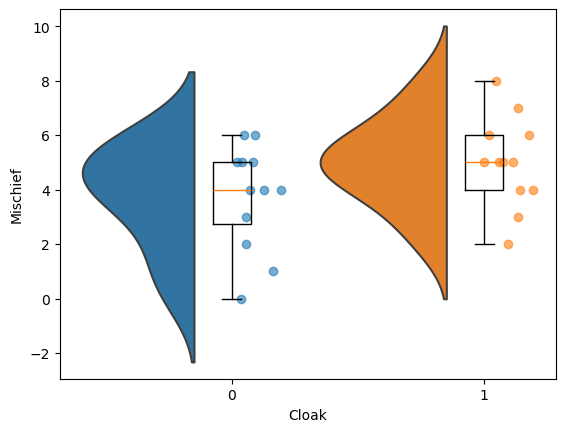

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import ptitprince as pt

fig, ax = plt.subplots()

# create half violin
pt.half_violinplot(x="Cloak", y="Mischief", data=df, inner=None, ax=ax, width=1)

# add rainclouds

cloaks = [0,1]

#enumerate over cloaks

for i, cloak in enumerate(cloaks):

    data = df[df["Cloak"] == cloak]

    # Jitter the values on the vertical axis
    x = i + np.random.uniform(high=0.2, size=len(data))
    
    # Select the values of the horizontal axis
    y = data["Mischief"]
    
    # Add the rain using the scatter method.
    ax.scatter(x, y, alpha=0.6)

# Generate list of arrays
boxplot_data = [
    df[df["Cloak"] == cloak]["Mischief"].to_numpy()
    for cloak in cloaks
]

# Vertical positions for the boxplots
POSITIONS = [0, 1]

ax.boxplot(boxplot_data, vert=True, positions=POSITIONS, manage_ticks=False)

plt.show()

No visible outliers, data is visually normally distributed. But to be sure, will test using Shapiro-Wilk test, for each cloak type

Note that we will use an alpha of 0.05

In [3]:
from scipy import stats as st

# Checking for shapiro wilk statistics:

# loop through cloak types:
for cloak in cloaks:
    data = df[df["Cloak"] == cloak]["Mischief"].to_numpy()
    test_stat, pval = st.shapiro(data)
    print(f"The shapiro test statistic for cloak {cloak} is {test_stat} and its p value is {pval} ")

The shapiro test statistic for cloak 0 is 0.9127634937409539 and its p value is 0.2314459072953191 
The shapiro test statistic for cloak 1 is 0.9726166907872743 and its p value is 0.9361892037703956 


Both Cloak types are normally distributed (having a p-value greater than alpha)

Now, we will use levene's test for equality of variance, to check the homogeneity of variances

In [4]:
# using scipy levene function

# comparing homogeneity of data when cloak = 0, and of data when cloak = 1
lev_stat, levpval = st.levene(df[df["Cloak"] == 0]["Mischief"].to_numpy(),  df[df["Cloak"] == 1]["Mischief"].to_numpy())
print(f"The Levene test statistic for is {lev_stat} and its p value is {levpval} ")

The Levene test statistic for is 0.2697547683923706 and its p value is 0.6086825890641905 


Since the p-value of the Levene's test is greater than 0.05, we can assume that the variance is homogenous across both value sets

Since all assumptions are met, we can proceed with the independent samples t-test

In [5]:
t_stat, tpval = st.ttest_ind(df[df["Cloak"] == 0]["Mischief"].to_numpy(),  df[df["Cloak"] == 1]["Mischief"].to_numpy())
print(f"The Independent samples t-test test statistic for is {t_stat} and its p value is {tpval} ")

The Independent samples t-test test statistic for is -1.713459383965147 and its p value is 0.10068634487481125 


With a p-value greater than 0.05, the independent samples t-test found that there is no statistically significant difference between the two groups.